In [1]:
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("salespred.csv")

In [3]:
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [4]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [8]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

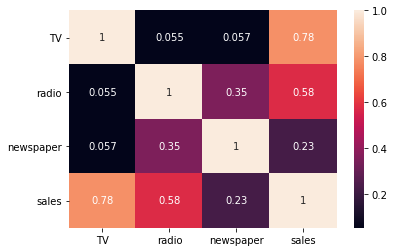

In [9]:
sns.heatmap(df.corr(),annot=True)

here we can see that the co-relation of sales with tv is high and then the radio

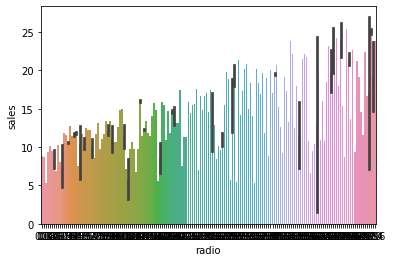

In [11]:
sns.barplot(x='radio',y='sales',data=df)
plt.show()

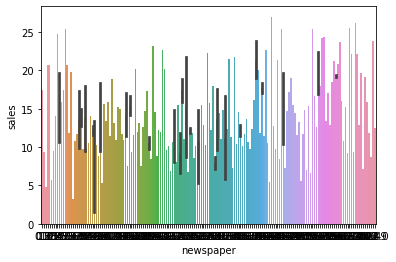

In [12]:
sns.barplot(x='newspaper',y='sales',data=df)

plt.show()

as we can see that with respect to time the sales due to tv and radio is increasing

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 15.9 KB


In [14]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(200, 4)

In [15]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


as  there is very less outliers present, we will not remove outliers


lets check for skewness in the data


In [16]:
from scipy.stats import skew


TV
-0.06932836662244649
radio
0.0934668451108453
newspaper
0.8879959753085498
sales
0.4045082487061191


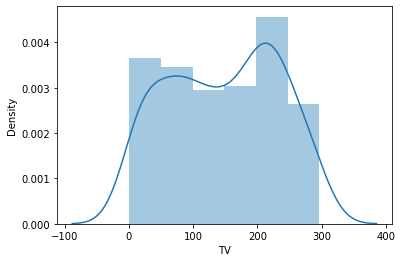

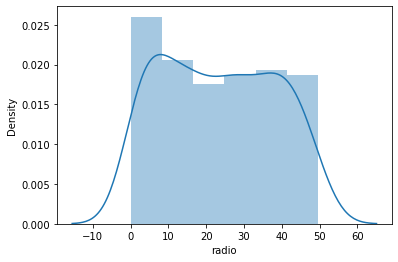

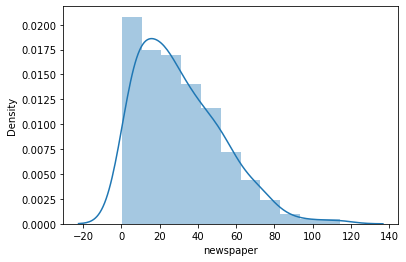

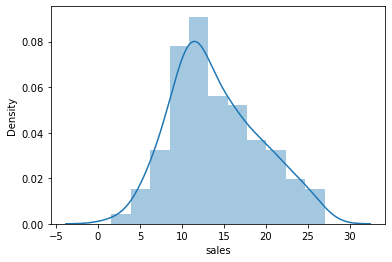

In [17]:
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show

now lets ckeck the corelation

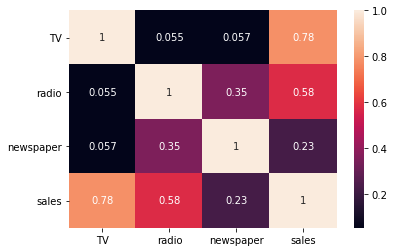

In [18]:
sns.heatmap(df.corr(),annot=True)
plt.show()


lets remove the skewness from newspaper because it does not have very much corelation with sales

In [19]:
df['newspaper']=np.sqrt(df['newspaper'])


now lets check the skewness

In [20]:
skew(df['newspaper'])

0.061918832707862255

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [22]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [23]:
sc=StandardScaler()
sc.fit(x)

StandardScaler()

In [24]:
standarized_data=sc.transform(x)

In [25]:
print(standarized_data)

[[ 9.69852266e-01  9.81522472e-01  1.56309461e+00]
 [-1.19737623e+00  1.08280781e+00  7.74855194e-01]
 [-1.51615499e+00  1.52846331e+00  1.56604912e+00]
 [ 5.20496822e-02  1.21785493e+00  1.23357596e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.23036007e+00]
 [-1.61540845e+00  1.73103399e+00  1.73106889e+00]
 [-1.04557682e+00  6.43904671e-01 -1.43678801e-01]
 [-3.13436589e-01 -2.47406325e-01 -8.52652825e-01]
 [-1.61657614e+00 -1.42906863e+00 -2.03568892e+00]
 [ 6.16042873e-01 -1.39530685e+00 -2.63332869e-01]
 [-9.45155670e-01 -1.17923146e+00 -1.08436840e-01]
 [ 7.90028350e-01  4.96973404e-02 -1.54396138e+00]
 [-1.43908760e+00  7.99208859e-01  1.46436938e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.20797302e+00]
 [ 6.66253447e-01  6.50657027e-01  8.07641928e-01]
 [ 5.64664612e-01  1.65000572e+00  1.04903522e+00]
 [-9.25304978e-01  9.00494200e-01  2.72279688e+00]
 [ 1.56887609e+00  1.10306488e+00  1.14575858e+00]
 [-9.08957349e-01 -1.86635121e-01 -4.23879865e-01]
 [ 3.00679600e-03  4.29449843e-

In [26]:
x=standarized_data
y=df.iloc[:,-1]

In [27]:
x

array([[ 9.69852266e-01,  9.81522472e-01,  1.56309461e+00],
       [-1.19737623e+00,  1.08280781e+00,  7.74855194e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.56604912e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.23357596e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.23036007e+00],
       [-1.61540845e+00,  1.73103399e+00,  1.73106889e+00],
       [-1.04557682e+00,  6.43904671e-01, -1.43678801e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.52652825e-01],
       [-1.61657614e+00, -1.42906863e+00, -2.03568892e+00],
       [ 6.16042873e-01, -1.39530685e+00, -2.63332869e-01],
       [-9.45155670e-01, -1.17923146e+00, -1.08436840e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.54396138e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.46436938e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.20797302e+00],
       [ 6.66253447e-01,  6.50657027e-01,  8.07641928e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.04903522e+00],
       [-9.25304978e-01,  9.00494200e-01

In [28]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [30]:
x_train.shape

(160, 3)

In [31]:
x_test.shape

(40, 3)

In [32]:
y_train.shape

(160,)

In [33]:
y_test.shape

(40,)

In [34]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))


0.9083811110854343


In [35]:
lr.intercept_

14.09071319276123

now training the model

In [36]:
y_pred=lr.predict(x_test)

In [37]:
df=pd.DataFrame(data=[y_pred,y_test])
df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,4.513225,12.052091,20.867239,11.842784,17.147519,17.676798,23.23247,7.718623,13.976975,10.687987,...,14.523735,3.598929,18.294034,15.510908,8.868326,22.912316,10.020518,15.416706,14.752929,20.081164
1,6.900000,11.700000,22.400000,10.800000,17.100000,14.800000,24.40000,7.600000,12.900000,10.500000,...,13.600000,5.300000,19.000000,12.700000,10.600000,24.200000,10.100000,14.600000,12.500000,20.200000


In [38]:
df.T

,0,1
0,4.513225,6.9
1,12.052091,11.7
2,20.867239,22.4
3,11.842784,10.8
4,17.147519,17.1
5,17.676798,14.8
6,23.232470,24.4
7,7.718623,7.6
8,13.976975,12.9
9,10.687987,10.5


In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [40]:
from sklearn.metrics import r2_score

In [41]:
score=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

print('r2score:',score)
print('mse:', mse)
print('mae',mae)

r2score: 0.8500083779957288
mse: 4.250836625964409
mae 1.38637436130671


In [42]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=3)
knr.fit(x_train,y_train)
knr.score(x_train,y_train)

0.9703339033820142

In [43]:
from sklearn.svm import SVR

In [44]:
svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)


0.9330896591929099

In [45]:
svr.predict(x_test)

array([ 7.84044498, 11.79956649, 21.76837723, 10.72834701, 16.95724417,
       14.33892333, 22.38209611,  8.25414005, 12.7080481 , 10.9756124 ,
       18.60489066, 14.99580468, 15.42207212, 10.14998928,  9.75757874,
       10.0583985 , 11.43437912, 14.87215591,  9.93703482, 13.3116573 ,
       12.53221436, 15.42754423,  9.03614226,  9.22172882, 11.41917451,
       10.08022299, 20.08369972, 14.29372539,  9.04299399, 21.09241482,
       13.287786  ,  8.0062413 , 19.59961988, 12.64946731, 10.27059047,
       22.86680974, 10.57042253, 14.23336572, 12.46561037, 19.95356423])

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

1.0

In [48]:
from sklearn.model_selection import cross_val_score
pred_test=knr.predict(x_test)
pred_train=knr.predict(x_test)

In [49]:
print(r2_score(y_test,pred_test))

0.8968593990866671


In [50]:
train_accuracy=r2_score(y_test,pred_train)
test_accuracy=(r2_score(y_test,pred_test))

In [51]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(svr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"at cross fold {j} the cv score is {cv_mean} and accuracy score for training is{train_accuracy} and accuracy for the testing is{test_accuracy}")
print("/n")

at cross fold 2 the cv score is 0.8497700769325178 and accuracy score for training is0.8968593990866671 and accuracy for the testing is0.8968593990866671
at cross fold 3 the cv score is 0.8926582417918634 and accuracy score for training is0.8968593990866671 and accuracy for the testing is0.8968593990866671
at cross fold 4 the cv score is 0.8986354062800865 and accuracy score for training is0.8968593990866671 and accuracy for the testing is0.8968593990866671
at cross fold 5 the cv score is 0.9011953652320344 and accuracy score for training is0.8968593990866671 and accuracy for the testing is0.8968593990866671
at cross fold 6 the cv score is 0.9115031497573424 and accuracy score for training is0.8968593990866671 and accuracy for the testing is0.8968593990866671
at cross fold 7 the cv score is 0.9041075166591348 and accuracy score for training is0.8968593990866671 and accuracy for the testing is0.8968593990866671
at cross fold 8 the cv score is 0.9047828933490165 and accuracy score for tr

In [52]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"at cross fold {j} the cv score is {cv_mean} and accuracy score for training is{train_accuracy} and accuracy for the testing is{test_accuracy}")
print("/n")

at cross fold 2 the cv score is 0.8916349860383765 and accuracy score for training is0.8968593990866671 and accuracy for the testing is0.8968593990866671
at cross fold 3 the cv score is 0.8915588165323286 and accuracy score for training is0.8968593990866671 and accuracy for the testing is0.8968593990866671
at cross fold 4 the cv score is 0.8903579284297554 and accuracy score for training is0.8968593990866671 and accuracy for the testing is0.8968593990866671
at cross fold 5 the cv score is 0.8873331295445761 and accuracy score for training is0.8968593990866671 and accuracy for the testing is0.8968593990866671
at cross fold 6 the cv score is 0.8900202280811488 and accuracy score for training is0.8968593990866671 and accuracy for the testing is0.8968593990866671
at cross fold 7 the cv score is 0.8861692012354757 and accuracy score for training is0.8968593990866671 and accuracy for the testing is0.8968593990866671
at cross fold 8 the cv score is 0.8826536626159895 and accuracy score for tr

In [53]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dtr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"at cross fold {j} the cv score is {cv_mean} and accuracy score for training is{train_accuracy} and accuracy for the testing is{test_accuracy}")
print("/n")

at cross fold 2 the cv score is 0.9358309568366083 and accuracy score for training is0.8968593990866671 and accuracy for the testing is0.8968593990866671
at cross fold 3 the cv score is 0.9435420820510093 and accuracy score for training is0.8968593990866671 and accuracy for the testing is0.8968593990866671
at cross fold 4 the cv score is 0.9395819350679628 and accuracy score for training is0.8968593990866671 and accuracy for the testing is0.8968593990866671
at cross fold 5 the cv score is 0.959303523004621 and accuracy score for training is0.8968593990866671 and accuracy for the testing is0.8968593990866671
at cross fold 6 the cv score is 0.9534989866428881 and accuracy score for training is0.8968593990866671 and accuracy for the testing is0.8968593990866671
at cross fold 7 the cv score is 0.9485004161391514 and accuracy score for training is0.8968593990866671 and accuracy for the testing is0.8968593990866671
at cross fold 8 the cv score is 0.9456446171913633 and accuracy score for tra

In [54]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [55]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)


0.9083811097336372

In [56]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.9083811110850966

In [57]:
en=ElasticNet(alpha=0.0001)
en.fit(x_train,y_train)
en.score(x_train,y_train)

0.9083811071864429

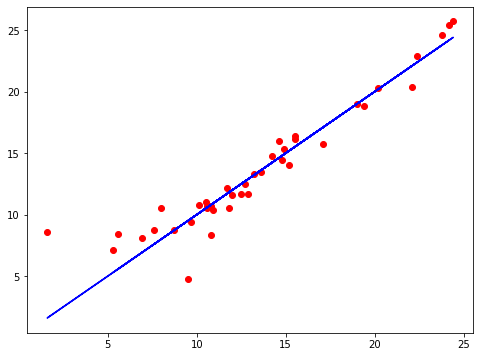

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color="r")
plt.plot(y_test,y_test,color="b")
plt.title=("linear regression")
plt.show()

In [59]:
import pickle
filename='pred_sales.pkl'
pickle.dump(lr,open(filename,'wb'))